## Importing the libaries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


## Loading the dataset

In [11]:
# Load the Dataset
bike_df = pd.read_csv(r'day.csv')
bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Dataset overview

In [12]:
# Dataset Overview
print("Dataset Shape:", bike_df.shape)
bike_df.info()
print("\nSummary Statistics:")
bike_df.describe()


Dataset Shape: (730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB

Summary Statistics:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Missing values and Duplicated Checks

In [13]:
# Missing Values Check
print("\nMissing Values (%):")
missing_percent = round(100 * (bike_df.isnull().sum() / len(bike_df)), 2).sort_values(ascending=False)
print(missing_percent)

# Check for Duplicates
print("\nChecking for Duplicates:")
duplicate_count = bike_df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_count}")

# Drop Duplicates if Any
bike_df.drop_duplicates(inplace=True)



Missing Values (%):
instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Checking for Duplicates:
Number of Duplicate Rows: 0


## Selecting the relevent coloumns for Analysis

In [14]:
# Selecting Relevant Columns for Analysis
bike_df1 = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]


## Exploratory Data Analysis

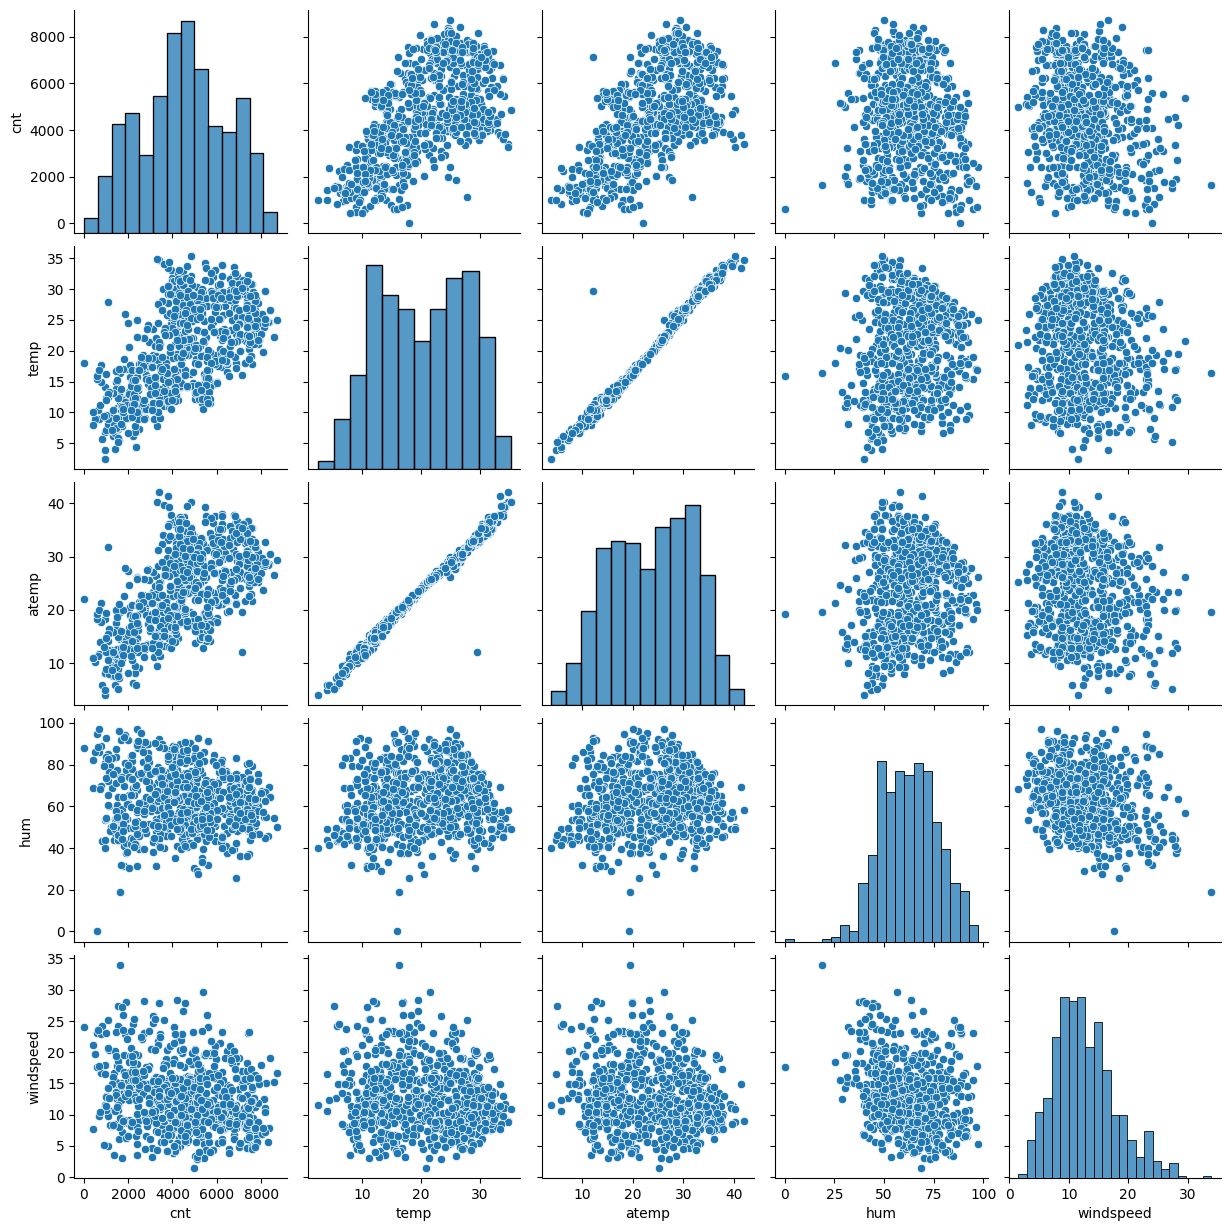

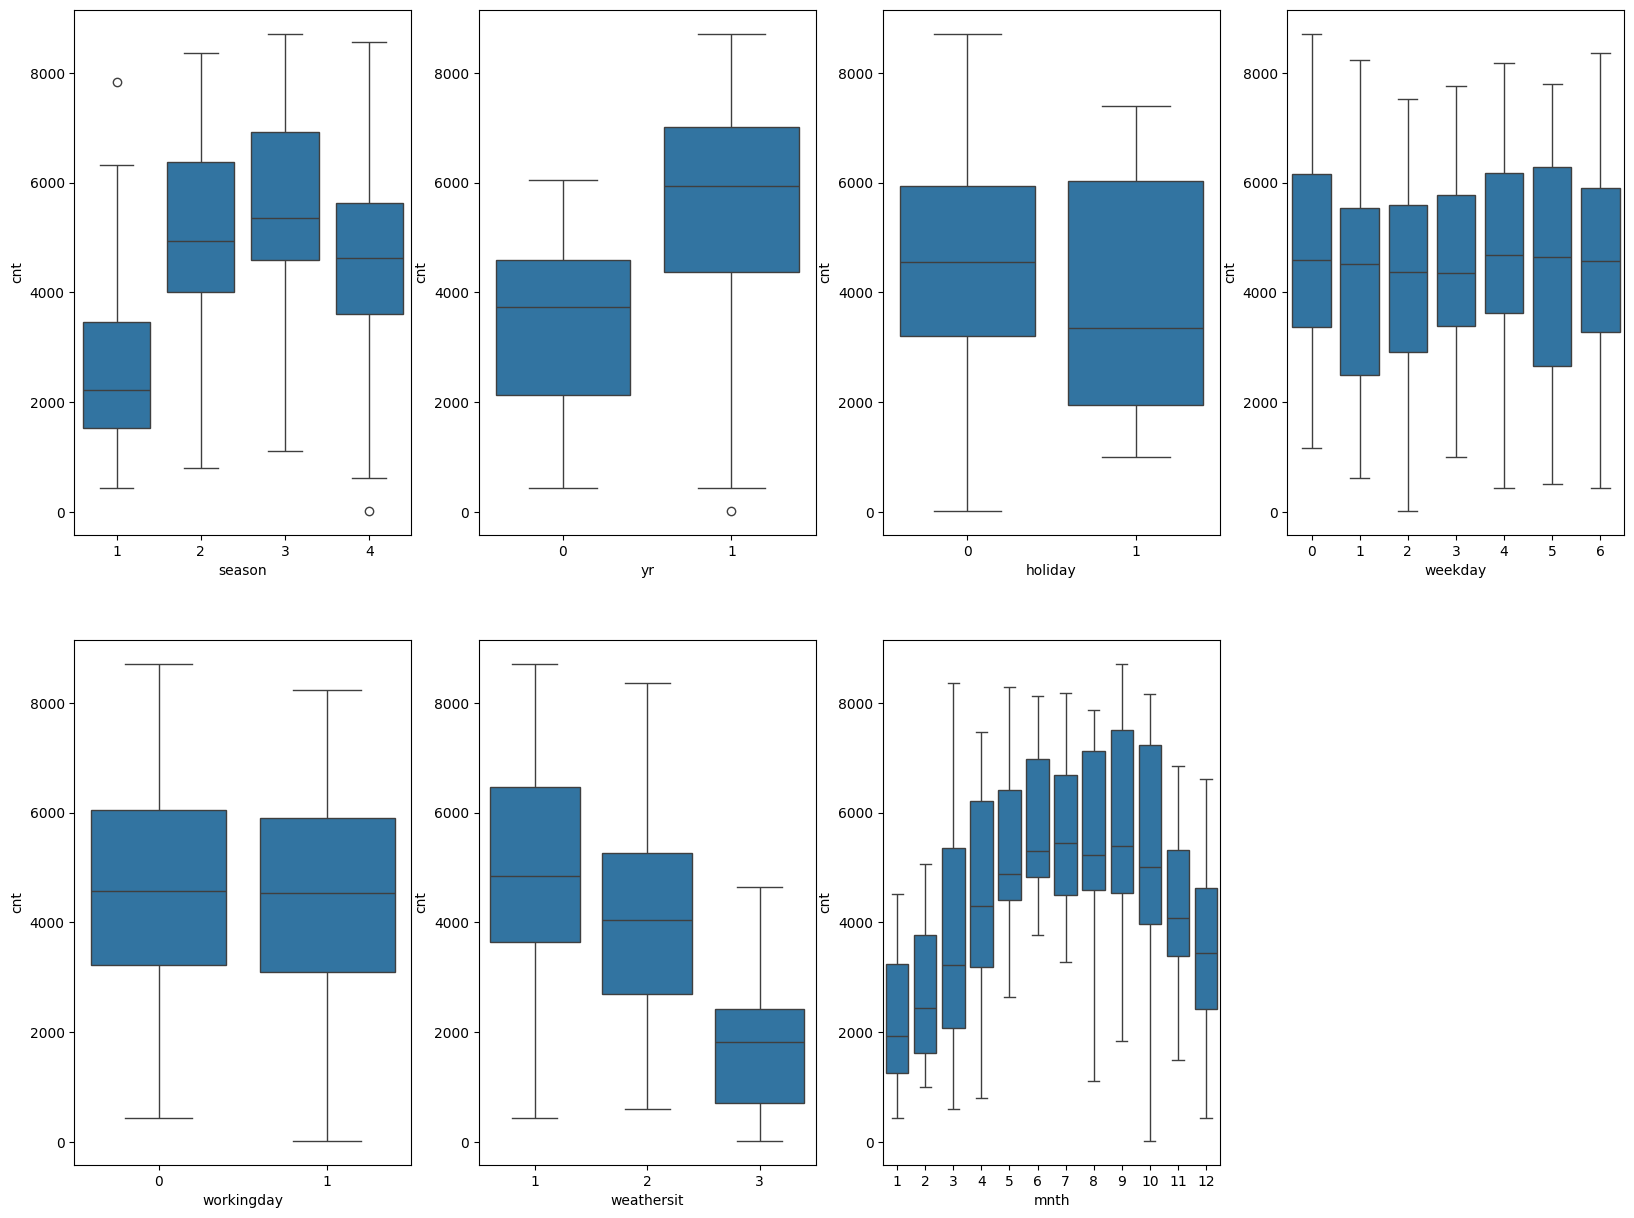

In [15]:
# Exploratory Data Analysis (EDA)
sns.pairplot(data=bike_df1, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.show()

# Boxplots for Categorical Variables
plt.figure(figsize=(20, 15))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bike_df1)
plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt', data=bike_df1)
plt.subplot(2, 4, 3)
sns.boxplot(x='holiday', y='cnt', data=bike_df1)
plt.subplot(2, 4, 4)
sns.boxplot(x='weekday', y='cnt', data=bike_df1)
plt.subplot(2, 4, 5)
sns.boxplot(x='workingday', y='cnt', data=bike_df1)
plt.subplot(2, 4, 6)
sns.boxplot(x='weathersit', y='cnt', data=bike_df1)
plt.subplot(2, 4, 7)
sns.boxplot(x='mnth', y='cnt', data=bike_df1)
plt.show()


In [16]:
print(bike_df1.columns)


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


## Data cleaning and conversion

In [ ]:
# Convert non-numeric columns to numeric
bike_df1['temp'] = pd.to_numeric(bike_df1['temp'], errors='coerce')
bike_df1['atemp'] = pd.to_numeric(bike_df1['atemp'], errors='coerce')
bike_df1['hum'] = pd.to_numeric(bike_df1['hum'], errors='coerce')
bike_df1['windspeed'] = pd.to_numeric(bike_df1['windspeed'], errors='coerce')

# Handle missing values by dropping or imputing
bike_df1.dropna(inplace=True)


## Creating Dummy Variables

In [18]:
dummy_vars = pd.get_dummies(bike_df1[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True)


bike_df1 = pd.concat([bike_df1, dummy_vars], axis=1)


bike_df1.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)


## Train-Test Split

In [19]:
# Train-Test Split
X = bike_df1.drop('cnt', axis=1)
y = bike_df1['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


## Feature scaling

In [20]:
# Feature Scaling
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])


## Feature Scaling (Before v/s After)

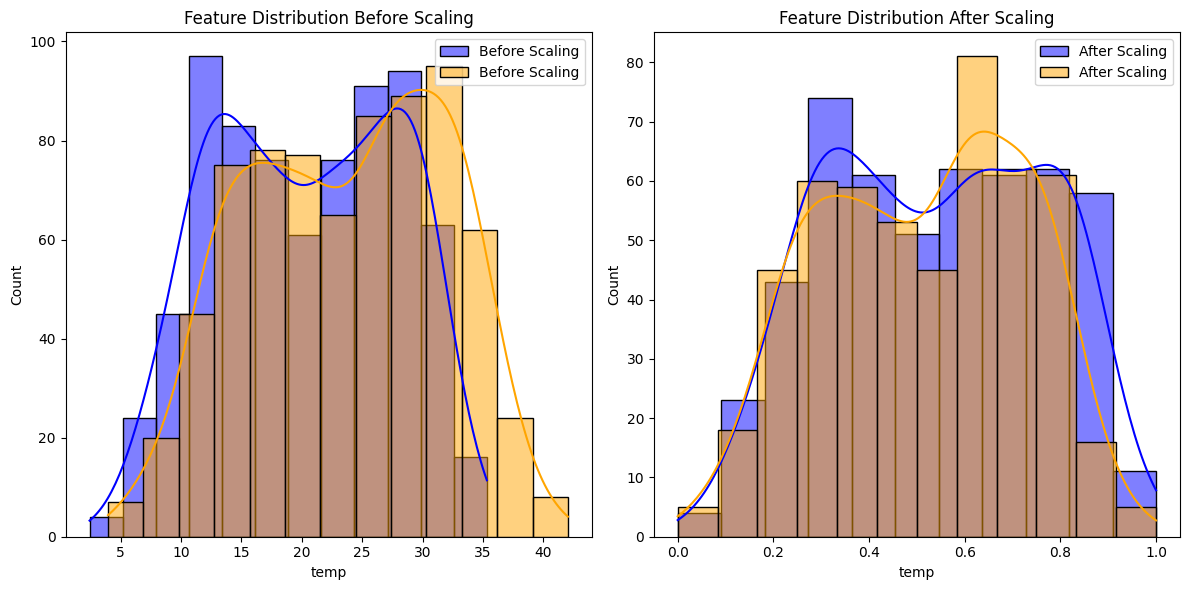

In [21]:
# Plot distribution of original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(bike_df1['temp'], kde=True, color='blue', label='Before Scaling')
sns.histplot(bike_df1['atemp'], kde=True, color='orange', label='Before Scaling')
plt.title('Feature Distribution Before Scaling')
plt.legend()

# Plot distribution of scaled data
plt.subplot(1, 2, 2)
sns.histplot(X_train['temp'], kde=True, color='blue', label='After Scaling')
sns.histplot(X_train['atemp'], kde=True, color='orange', label='After Scaling')
plt.title('Feature Distribution After Scaling')
plt.legend()

plt.tight_layout()
plt.show()


## Correlation Heatmap

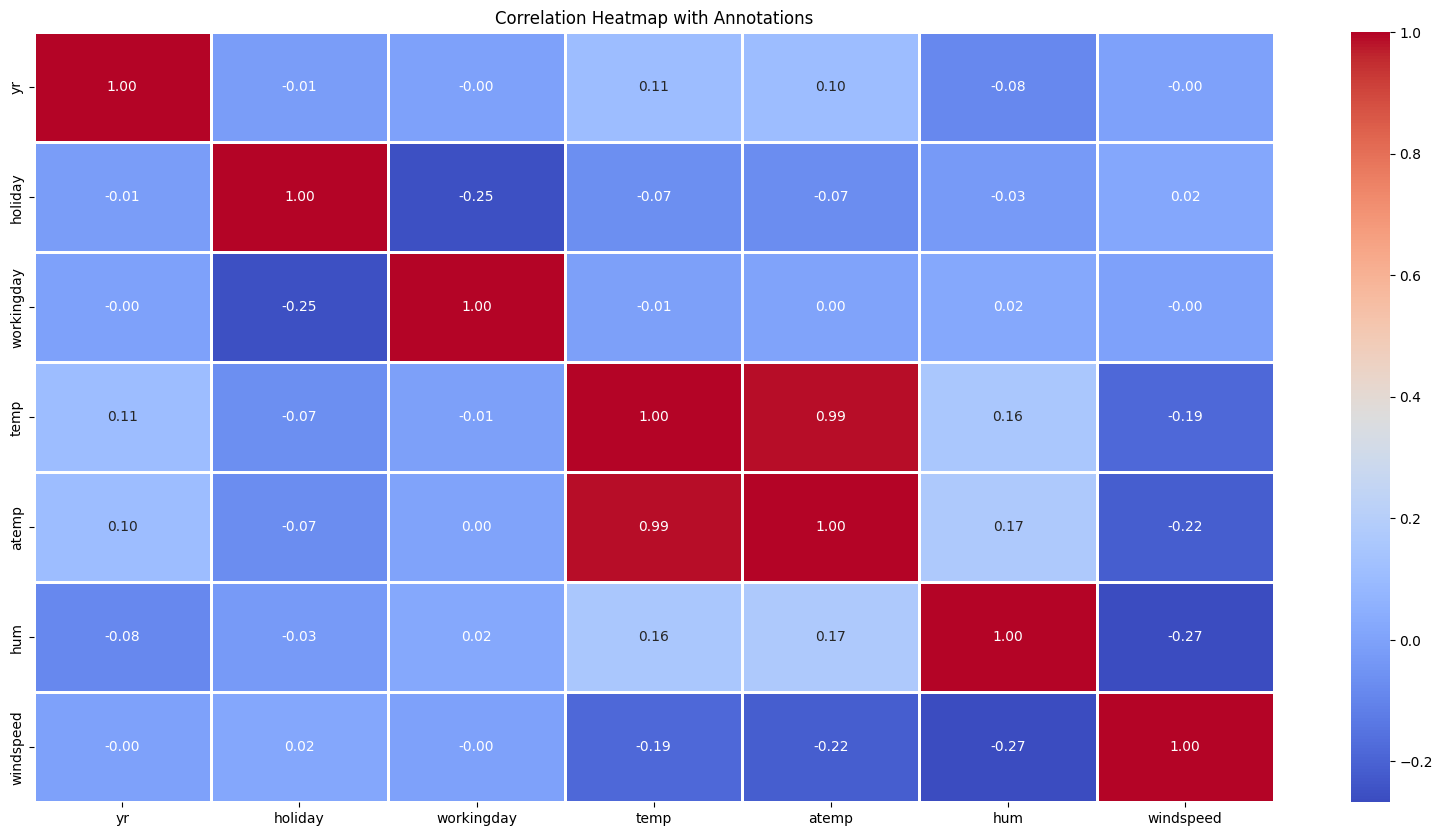

In [22]:
# Correlation Heatmap: Enhanced visualization
plt.figure(figsize=(20, 10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, annot_kws={'size': 10})
plt.title("Correlation Heatmap with Annotations")
plt.show()


## Feature selection using RFE

In [23]:
# Feature Selection using RFE
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'], dtype='object')


c:\Users\nitro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=15 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(


c:\Users\nitro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=15 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected Features: Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'], dtype='object')


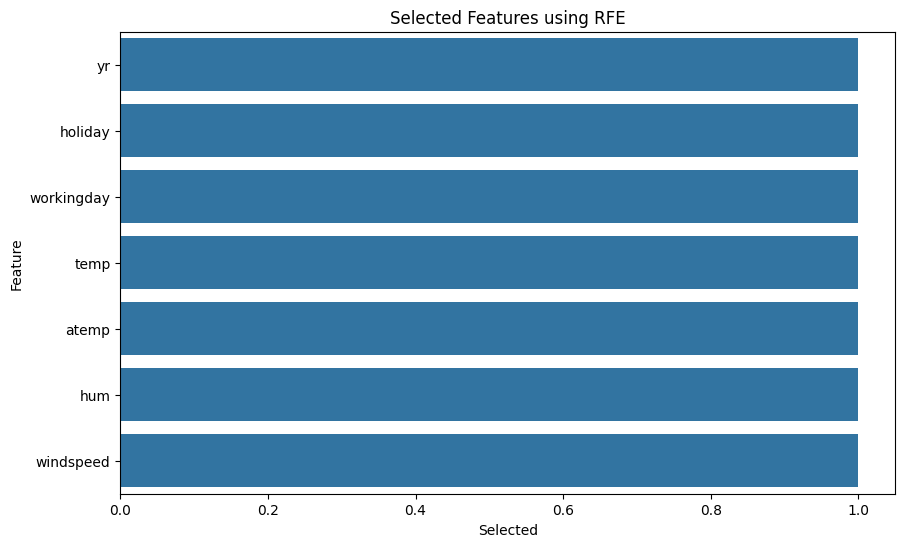

In [24]:
# Feature Selection using RFE
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Plotting the feature selection results
plt.figure(figsize=(10, 6))
sns.barplot(x=rfe.support_, y=X_train.columns)
plt.title("Selected Features using RFE")
plt.xlabel("Selected")
plt.ylabel("Feature")
plt.show()


## Building the linear regression model

In [25]:
# Building the Model
X_train_rfe = sm.add_constant(X_train[selected_features])
lm_model = sm.OLS(y_train, X_train_rfe).fit()
print(lm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     204.1
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          2.01e-142
Time:                        21:18:51   Log-Likelihood:                -4243.3
No. Observations:                 510   AIC:                             8503.
Df Residuals:                     502   BIC:                             8537.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2840.8943    283.187     10.032      0.0

## Variance inflation Factore

In [26]:
# VIF Calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_rfe.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
print("\nVIF Data:")
print(vif_data)



VIF Data:
      Feature        VIF
0       const  40.777658
1          yr   1.022740
2     holiday   1.074934
3  workingday   1.075753
4        temp  50.123837
5       atemp  50.786067
6         hum   1.106190
7   windspeed   1.144413


## Residual Analysis

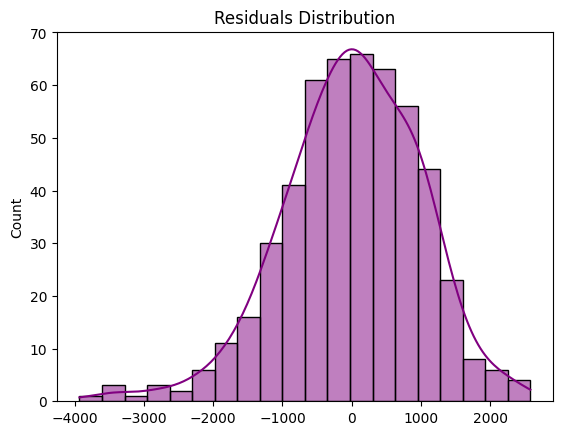

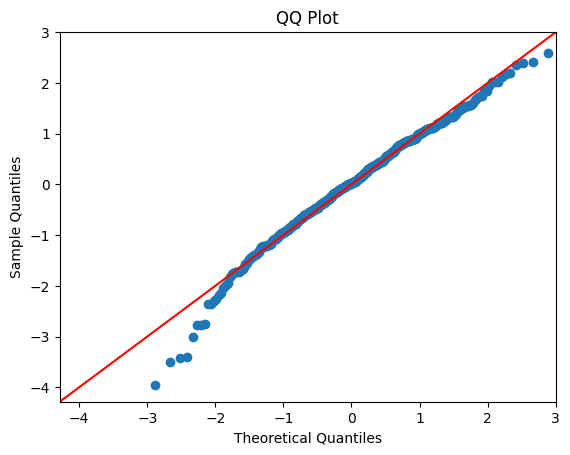

In [27]:
# Residual Analysis
y_train_pred = lm_model.predict(X_train_rfe)
sns.histplot(y_train - y_train_pred, kde=True, bins=20, color='purple')
plt.title("Residuals Distribution")
plt.show()

# QQ Plot
sm.qqplot(y_train - y_train_pred, line='45', fit=True)
plt.title("QQ Plot")
plt.show()


## Model Evaluation on Test Data

R2 Score (Train): 0.7400344918204151
R2 Score (Test): 0.7162648283843049


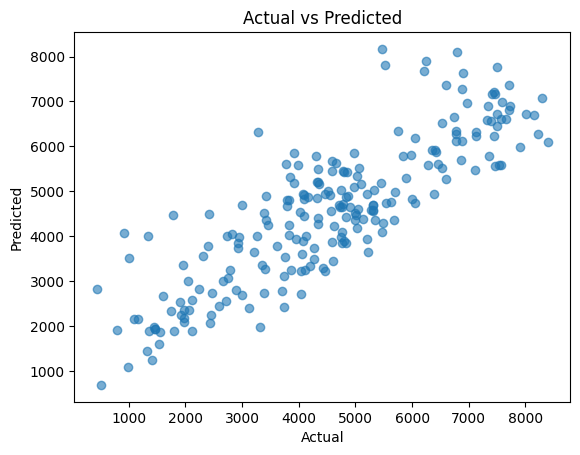

In [28]:
# Model Evaluation on Test Data
X_test_rfe = sm.add_constant(X_test[selected_features])
y_test_pred = lm_model.predict(X_test_rfe)

# R2 Score
print("R2 Score (Train):", r2_score(y_train, y_train_pred))
print("R2 Score (Test):", r2_score(y_test, y_test_pred))

# Scatter Plot of Actual vs Predicted
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
